Copyright (C) 2025  Diarmuid

This program is free software: you can redistribute it and/or modify\
it under the terms of the GNU General Public License as published by\
the Free Software Foundation, either version 3 of the License, or\
(at your option) any later version.

This program is distributed in the hope that it will be useful,\
but WITHOUT ANY WARRANTY; without even the implied warranty of\
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the\
GNU General Public License for more details.

You should have received a copy of the GNU General Public License\
along with this program.  If not, see <https://www.gnu.org/licenses/>.

----------------------------------------------------------------------

Author: Diarmuid O"Neill\
Student Number: C00282898\
Date: 04/11/2025\
Brief Description:\
This project aims to investigate if sleep and lifestyle factors can \
predict the presence of sleep disorders. The full dataset has 374  
entries. See Technical Specification for more information. \
This notebooks uses Gaussian Naieve Bayes to ...

Standard Imports

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib. pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset.csv")

Gaussian Naieve Bayes

This Gaussian Naieve Bayes model aims to classify different sleep disorders and investigate the relationship between Quality of Sleep, Stress Level and Sleep Disorders. It investigates if it is possible to predict the presence of a specific sleep disorders (Insomnia and Sleep Apnea) given stress and sleep quality levels. Sleep Quality is a self reported rating, ranging from 1-10 and Stress Level is also a self reported rating, ranging from 1-10. An instance where an individual does not have a sleep disorder appears as a green dot on the graph, insomnia appears as a red dot and sleep apnea appears in blue. It is expected that individuals with lower sleep quality and higher stress will be more likely to have insomnia and sleep apnea.

Stress Level        0.139380
Quality of Sleep   -0.332406
dtype: float64


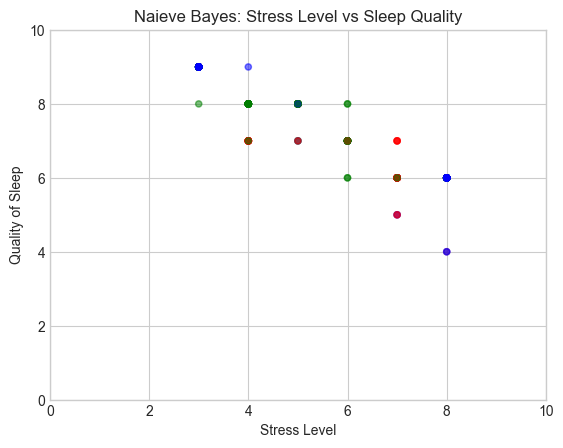

In [25]:
# Features
X = dataset[["Stress Level", "Quality of Sleep"]]

# Target
le = LabelEncoder()
y = le.fit_transform(dataset["Sleep Disorder"])
# Converts y to numeric values ie. 0=None, 1=Insomnia 2=Sleep Apnea

# random_state ensures reproducibility 
# test_size=0.3 means that 30% of the data is used for testing and 70% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

# Map Sleep Disorder to colors
color_map = {"Insomnia":"red", "Sleep Apnea":"blue"}
colors = dataset["Sleep Disorder"].map(color_map).fillna("green")

plt.ylim(0,10)
plt.xlim(0, 10)
# Added opacity to help with visualization
plt.scatter(dataset["Stress Level"], dataset["Quality of Sleep"], c=colors, alpha=0.3, s=20)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.title("Naieve Bayes: Stress Level vs Sleep Quality")
print(dataset[["Stress Level", "Quality of Sleep"]].corrwith((dataset['Sleep Disorder'] == 'Insomnia').astype(int)))

From looking at this graph we can see that sleep apnea appears across a wide range of stress levels and sleep quality levels. This means there is no clear correalation between these features and sleep apnea. However there may be a slight correlation between the presence of insomnia and sleep quality and stress. In this model insomnia only appears when sleep quality is less than 8 and stress is higher than 3. The stress level correlation coefficient of 0.13 indicates a small positive correalation between stress and the presence of insomnia in an individual. The correlation coefficient of -0.33 indicates a negative correlation between quality of sleep and insomnia.